In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nuuk
Processing Record 2 of Set 1 | pisco
Processing Record 3 of Set 1 | valdivia
Processing Record 4 of Set 1 | vestmanna
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | carutapera
Processing Record 9 of Set 1 | grand centre
City not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | ikalamavony
Processing Record 12 of Set 1 | ndele
Processing Record 13 of Set 1 | abatskoye
Processing Record 14 of Set 1 | tucurui
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | eyl
Processing Record 20 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 21 of Set 1 | eureka
Processing Record 22 of Set 1 | san

Processing Record 39 of Set 4 | poronaysk
Processing Record 40 of Set 4 | asau
Processing Record 41 of Set 4 | novoagansk
Processing Record 42 of Set 4 | port elizabeth
Processing Record 43 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 44 of Set 4 | tual
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | kaura namoda
Processing Record 47 of Set 4 | lingao
Processing Record 48 of Set 4 | esperance
Processing Record 49 of Set 4 | jakarta
Processing Record 50 of Set 4 | teguldet
Processing Record 1 of Set 5 | paranhos
Processing Record 2 of Set 5 | dwarka
Processing Record 3 of Set 5 | cao bang
Processing Record 4 of Set 5 | kinablangan
Processing Record 5 of Set 5 | faya
Processing Record 6 of Set 5 | sabha
Processing Record 7 of Set 5 | dunedin
Processing Record 8 of Set 5 | solnechnyy
Processing Record 9 of Set 5 | portland
Processing Record 10 of Set 5 | zhuhai
Processing Record 11 of Set 5 | preeceville
Processing Record 12 of 

Processing Record 28 of Set 8 | bonthe
Processing Record 29 of Set 8 | sataua
City not found. Skipping...
Processing Record 30 of Set 8 | sharan
Processing Record 31 of Set 8 | menomonie
Processing Record 32 of Set 8 | turukhansk
Processing Record 33 of Set 8 | chingirlau
Processing Record 34 of Set 8 | bulgan
Processing Record 35 of Set 8 | bad durkheim
Processing Record 36 of Set 8 | duldurga
Processing Record 37 of Set 8 | yining
Processing Record 38 of Set 8 | port blair
Processing Record 39 of Set 8 | beberibe
Processing Record 40 of Set 8 | skelleftea
Processing Record 41 of Set 8 | bam
Processing Record 42 of Set 8 | lawrenceburg
Processing Record 43 of Set 8 | mana
Processing Record 44 of Set 8 | ugoofaaru
Processing Record 45 of Set 8 | sinkat
City not found. Skipping...
Processing Record 46 of Set 8 | vredendal
Processing Record 47 of Set 8 | ambilobe
Processing Record 48 of Set 8 | pandan
Processing Record 49 of Set 8 | shu
Processing Record 50 of Set 8 | nouadhibou
Processi

Processing Record 16 of Set 12 | kizukuri
Processing Record 17 of Set 12 | qarqin
Processing Record 18 of Set 12 | morehead
Processing Record 19 of Set 12 | kaseda
Processing Record 20 of Set 12 | menongue
Processing Record 21 of Set 12 | seoul
Processing Record 22 of Set 12 | fonte boa
Processing Record 23 of Set 12 | kavaratti
Processing Record 24 of Set 12 | kameoka
Processing Record 25 of Set 12 | juifang
City not found. Skipping...
Processing Record 26 of Set 12 | san patricio
Processing Record 27 of Set 12 | fairview
Processing Record 28 of Set 12 | malwan
City not found. Skipping...
Processing Record 29 of Set 12 | ulladulla
Processing Record 30 of Set 12 | tolbazy
Processing Record 31 of Set 12 | manado
Processing Record 32 of Set 12 | manakara
Processing Record 33 of Set 12 | mindelo
Processing Record 34 of Set 12 | jiuquan
Processing Record 35 of Set 12 | akyab
Processing Record 36 of Set 12 | capitao poco
Processing Record 37 of Set 12 | caronport
Processing Record 38 of Set

In [7]:
len(city_data)

572

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nuuk,64.1835,-51.7216,48.81,43,20,16.11,GL,2021-10-03 18:08:38
1,Pisco,-13.7000,-76.2167,68.05,64,40,17.27,PE,2021-10-03 18:11:11
2,Valdivia,-39.8142,-73.2459,53.69,49,40,0.92,CL,2021-10-03 18:11:11
3,Vestmanna,62.1564,-7.1664,45.52,93,90,44.87,FO,2021-10-03 18:09:15
4,Hobart,-42.8794,147.3294,54.10,96,90,0.00,AU,2021-10-03 18:11:12
5,Mataura,-46.1927,168.8643,44.47,92,100,6.91,NZ,2021-10-03 18:11:12
6,East London,-33.0153,27.9116,59.23,68,21,6.15,ZA,2021-10-03 18:11:13
7,Carutapera,-1.1950,-46.0200,87.76,56,49,12.59,BR,2021-10-03 18:11:13
8,Punta Arenas,-53.1500,-70.9167,42.91,75,75,35.68,CL,2021-10-03 18:09:59
9,Ikalamavony,-21.1500,46.5833,70.66,65,55,4.90,MG,2021-10-03 18:11:13


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nuuk,GL,2021-10-03 18:08:38,64.1835,-51.7216,48.81,43,20,16.11
1,Pisco,PE,2021-10-03 18:11:11,-13.7000,-76.2167,68.05,64,40,17.27
2,Valdivia,CL,2021-10-03 18:11:11,-39.8142,-73.2459,53.69,49,40,0.92
3,Vestmanna,FO,2021-10-03 18:09:15,62.1564,-7.1664,45.52,93,90,44.87
4,Hobart,AU,2021-10-03 18:11:12,-42.8794,147.3294,54.10,96,90,0.00
5,Mataura,NZ,2021-10-03 18:11:12,-46.1927,168.8643,44.47,92,100,6.91
6,East London,ZA,2021-10-03 18:11:13,-33.0153,27.9116,59.23,68,21,6.15
7,Carutapera,BR,2021-10-03 18:11:13,-1.1950,-46.0200,87.76,56,49,12.59
8,Punta Arenas,CL,2021-10-03 18:09:59,-53.1500,-70.9167,42.91,75,75,35.68
9,Ikalamavony,MG,2021-10-03 18:11:13,-21.1500,46.5833,70.66,65,55,4.90


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

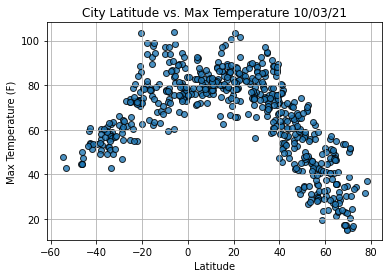

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

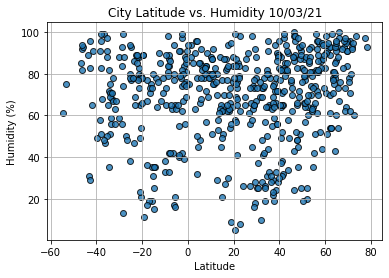

In [13]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

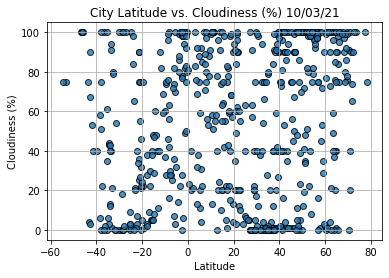

In [14]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

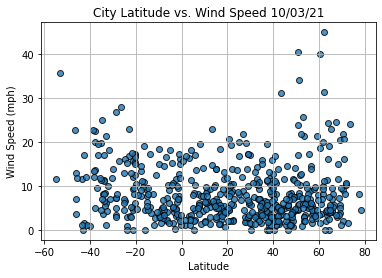

In [15]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()